In [1]:
# Loading all libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import itertools
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram

In [2]:
df = pd.read_csv("C:/Users/Hp/Desktop/MSC 550/auto_policies_2020.csv")
df

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium
0,43124327,12/30/2020,F,4.0,7/12/1968,381.0,D,133.6,2,HBACK,1.331,NaN,0,0.0,716.53
1,21919609,12/30/2020,F,2.0,11/5/1982,549.0,D,163.6,1,UTE,3.740,NaN,0,0.0,716.53
2,72577057,12/30/2020,M,2.0,11/26/1983,649.0,B,117.5,4,COUPE,0.880,NaN,0,0.0,716.53
3,92175225,12/30/2020,M,4.0,11/2/1960,743.0,B,100.7,3,SEDAN,1.045,NaN,0,0.0,716.53
4,66223239,12/30/2020,F,4.0,1/4/1968,817.0,C,115.5,4,HBACK,0.473,NaN,0,0.0,716.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60387,73248694,1/2/2020,F,5.0,5/10/1956,809.0,C,145.5,4,HBACK,0.891,NaN,0,0.0,716.53
60388,71411764,1/2/2020,M,4.0,3/22/1961,681.0,D,86.3,1,HBACK,1.881,NaN,0,0.0,716.53
60389,89353155,1/2/2020,M,4.0,9/29/1965,773.0,F,110.0,1,STNWG,5.170,NaN,0,0.0,716.53
60390,40916605,1/2/2020,M,3.0,8/1/1978,714.0,B,NaN,1,HBACK,1.903,NaN,0,0.0,716.53


In [3]:
df_updated = df.drop(['pol_number', 'pol_eff_dt', 'gender', 'date_of_birth', 'area', 'traffic_index', 'veh_body', 
                    'veh_value', 'claim_office', 'annual_premium', 'numclaims'], axis = 1)
df_updated

,agecat,credit_score,veh_age,claimcst0
0,4.0,381.0,2,0.0
1,2.0,549.0,1,0.0
2,2.0,649.0,4,0.0
3,4.0,743.0,3,0.0
4,4.0,817.0,4,0.0
...,...,...,...,...
60387,5.0,809.0,4,0.0
60388,4.0,681.0,1,0.0
60389,4.0,773.0,1,0.0
60390,3.0,714.0,1,0.0


In [4]:
df_updated.isnull().sum()

agecat          4831
credit_score    2801
veh_age            0
claimcst0          0
dtype: int64

In [5]:
df_updated2 = df_updated.dropna()
df_updated2

,agecat,credit_score,veh_age,claimcst0
0,4.0,381.0,2,0.0
1,2.0,549.0,1,0.0
2,2.0,649.0,4,0.0
3,4.0,743.0,3,0.0
4,4.0,817.0,4,0.0
...,...,...,...,...
60386,3.0,755.0,4,0.0
60387,5.0,809.0,4,0.0
60388,4.0,681.0,1,0.0
60389,4.0,773.0,1,0.0


In [6]:
scaler = MinMaxScaler() # to define scaler
scaler.fit(df_updated2) # to fit the data in the scaler
df_updated2_scaled = scaler.transform(df_updated2)
df_updated2_scaled = pd.DataFrame(df_updated2_scaled) # to display the fitted data as a dataframe
df_updated2_scaled

,0,1,2,3
0,0.6,0.145719,0.333333,0.0
1,0.2,0.451730,0.000000,0.0
2,0.2,0.633880,1.000000,0.0
3,0.6,0.805100,0.666667,0.0
4,0.6,0.939891,1.000000,0.0
...,...,...,...,...
52984,0.4,0.826958,1.000000,0.0
52985,0.8,0.925319,1.000000,0.0
52986,0.6,0.692168,0.000000,0.0
52987,0.6,0.859745,0.000000,0.0


In [7]:
SSE = [] # Define empty list to store results of for loop

for k in range(3,16): # Indexing k from 3 to 15
    kmeans = KMeans(n_clusters = k) # k-means clustering algorithm where we are iterating through k
    kmeans.fit(df_updated2_scaled) # Fitting k-means clustering algorithm 
    SSE.append(kmeans.inertia_) # Appending the SSE to the empty list.

In [8]:
results = pd.DataFrame({"k": range(3,16), # Creating data frame of results
                       "SSE/Inertia": SSE})
results

,k,SSE/Inertia
0,3,7076.016452
1,4,5651.652188
2,5,4920.334060
3,6,4439.270645
4,7,3960.361265
5,8,3616.281369
6,9,3338.742677
7,10,3084.066359
8,11,2792.329881
9,12,2538.605695


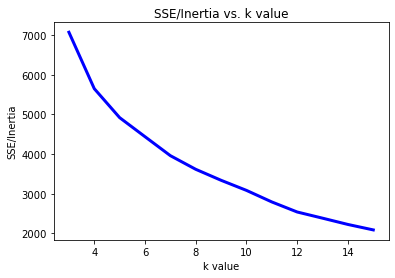

In [9]:
plt.plot(results["k"], results["SSE/Inertia"], linewidth = 3, color = "blue") # Creating visualization to use elbow method
plt.xlabel("k value") # x axis label
plt.ylabel("SSE/Inertia") # y axis label
plt.title("SSE/Inertia vs. k value"); # title

From the above graph, it is reasonable to say that the elbow is anywhere between k=8 and k=12. 

In [10]:
# Using the silhouette score metric to determine k
range_n_clusters = [3,4,5,6,7,8,9,10,11,12,13,14,15]
silhouette_avg = []
auto_sample = df_updated2_scaled.sample(frac=.1)
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(auto_sample )
    cluster_labels = kmeans.labels_
    # silhouette score
    score = silhouette_score(auto_sample , cluster_labels)
    silhouette_avg.append(score)

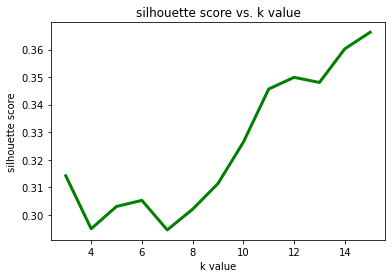

In [11]:
# visualizing silhouette scores
plt.plot(range_n_clusters, silhouette_avg, linewidth = 3, color = "green")
plt.xlabel("k value") # x axis label
plt.ylabel("silhouette score") # y axis label
plt.title("silhouette score vs. k value"); # title

The above graph shows that the cluster with the highest score is 14. However, this cluster is outside the reasonable clusters that are given in the elbow method. Therefore, We can choose cluster 11 which has a slightly higher score than average and still part of the range in the elbow method. From the silhouette score and the elbow method, it is reasonable to choose 11 clusters for this dataset. 

In [12]:
best_kmeans = KMeans(n_clusters = 11) # Rerun k-means algorithm to get the algorithm with the best k result we chose i.e. k = 8
best_kmeans.fit(df_updated2_scaled)

KMeans(n_clusters=11)

In [13]:
# Creating a column in the original data with the corresponding clusters
# Note that I did not add this column to the scaled data
df_updated2['kmeans_clusters'] = best_kmeans.labels_ 
df_updated2.sort_values('kmeans_clusters') # sort clusterings to easily read data frame
df_updated2.groupby("kmeans_clusters").describe() # get summary statistics for each cluster.

C:\Users\Hp\AppData\Local\Temp/ipykernel_5956/3056666397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated2['kmeans_clusters'] = best_kmeans.labels_


agecat                                               \
                  count      mean       std  min  25%  50%  75%  max   
kmeans_clusters                                                        
0                3295.0  1.600000  0.489972  1.0  1.0  2.0  2.0  2.0   
1                5280.0  5.357197  0.479219  5.0  5.0  5.0  6.0  6.0   
2                6726.0  5.349390  0.476813  5.0  5.0  5.0  6.0  6.0   
3                3650.0  2.072877  0.673789  1.0  2.0  2.0  3.0  3.0   
4                4169.0  1.655313  0.475323  1.0  1.0  2.0  2.0  2.0   
5                2677.0  5.047441  0.863427  4.0  4.0  5.0  6.0  6.0   
6                4179.0  3.609476  0.582303  3.0  3.0  4.0  4.0  5.0   
7                6607.0  3.503557  0.500025  3.0  3.0  4.0  4.0  4.0   
8                7867.0  3.228295  0.748248  2.0  3.0  3.0  4.0  4.0   
9                5538.0  3.557060  0.531892  3.0  3.0  4.0  4.0  5.0   
10               3001.0  2.556481  1.159695  1.0  2.0  2.0  3.0  6.0   

                credit_score              ... veh_age      claimcst0  \
                       count        mean  ...     75%  max     count   
kmeans_clusters                           ...                          
0                     3295.0  666.867982  ...     3.0  4.0    3295.0   
1                     5280.0  760.721212  ...     2.0  2.0    5280.0   
2                     6726.0  771.153880  ...     4.0  4.0    6726.0   
3                     3650.0  435.074795  ...     4.0  4.0    3650.0   
4                     4169.0  661.923723  ...     2.0  2.0    4169.0   
5                     2677.0  442.722077  ...     4.0  4.0    2677.0   
6                     4179.0  692.687006  ...     1.0  1.0    4179.0   
7                     6607.0  706.600272  ...     3.0  3.0    6607.0   
8                     7867.0  699.094699  ...     4.0  4.0    7867.0   
9                     5538.0  698.520946  ...     2.0  2.0    5538.0   
10                    3001.0  411.834389  ...     2.0  2.0    3001.0   

                                                                        \
                        mean           std  min  25%  50%          75%   
kmeans_clusters                                                          
0                 193.263145    713.351089  0.0  0.0  0.0     0.000000   
1                 370.054514   2574.226223  0.0  0.0  0.0     0.000000   
2                  49.273452    275.329243  0.0  0.0  0.0     0.000000   
3                1244.496318   2986.505381  0.0  0.0  0.0  1277.335915   
4                 496.099989   2119.771342  0.0  0.0  0.0     0.000000   
5                2276.849733   5511.788741  0.0  0.0  0.0  2182.440944   
6                 460.215282   2458.765033  0.0  0.0  0.0     0.000000   
7                  67.134704    354.166088  0.0  0.0  0.0     0.000000   
8                  48.805572    233.579303  0.0  0.0  0.0     0.000000   
9                 109.573304    690.981403  0.0  0.0  0.0     0.000000   
10               4849.202936  10458.607677  0.0  0.0  0.0  4539.631277   

                               
                          max  
kmeans_clusters                
0                13660.033920  
1                56116.141240  
2                 9783.665898  
3                55846.046570  
4                44679.078620  
5                62843.748350  
6                56389.145700  
7                10499.903990  
8                 5782.399655  
9                29858.711240  
10               69478.897830  

[11 rows x 32 columns]

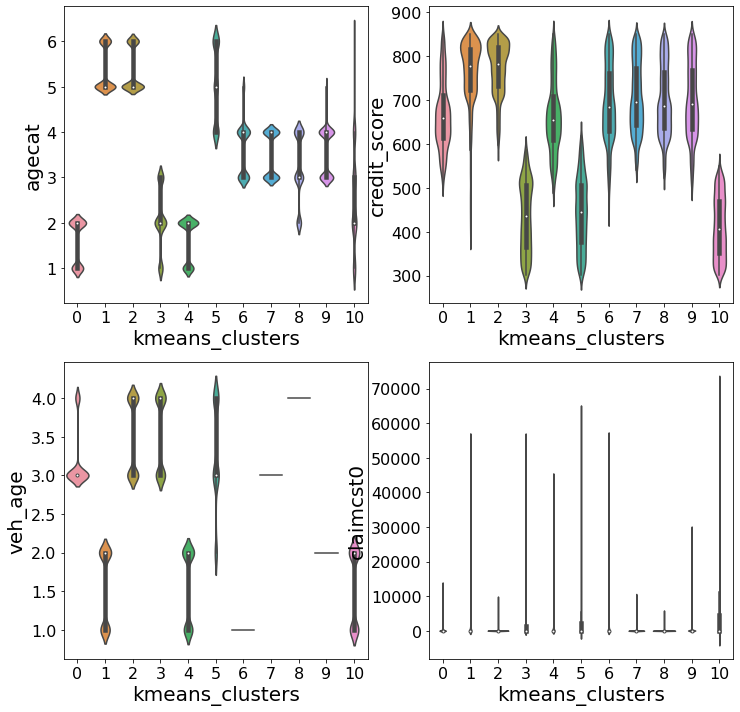

In [14]:
fig, axes = plt.subplots(2, 2, figsize = (12,12)) # Create grid of subplots using Seaborn

ax = sns.violinplot(data = df_updated2, x = "kmeans_clusters", y = "agecat", ax=axes[0,0]) # Define first plot
ax.set_xlabel('kmeans_clusters', fontsize = 20) # Parameters for first plot, making x label bigger
ax.set_ylabel('agecat', fontsize = 20) # Parameters for first plot, making y label bigger
ax.tick_params(axis='x', labelsize=16)# Parameters for first plot, making x tick marks bigger
ax.tick_params(axis='y', labelsize=16)# Parameters for first plot, making y tick marks bigger

ax = sns.violinplot(data = df_updated2, x = "kmeans_clusters", y = "credit_score", ax=axes[0,1])
ax.set_xlabel('kmeans_clusters', fontsize = 20)
ax.set_ylabel('credit_score', fontsize = 20)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

ax = sns.violinplot(data = df_updated2, x = "kmeans_clusters", y = "veh_age", ax=axes[1,0])
ax.set_xlabel('kmeans_clusters', fontsize = 20)
ax.set_ylabel('veh_age', fontsize = 20)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

ax = sns.violinplot(data = df_updated2, x = "kmeans_clusters", y = "claimcst0", ax=axes[1,1])
ax.set_xlabel('kmeans_clusters', fontsize = 20)
ax.set_ylabel('claimcst0', fontsize = 20)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)


hierarchial

In [15]:
a_sample = df_updated2.sample(frac = .1)
a_sample

,agecat,credit_score,veh_age,claimcst0,kmeans_clusters
36024,5.0,723.0,3,0.000000,2
14846,6.0,825.0,2,0.000000,1
39283,5.0,754.0,4,0.000000,2
53313,3.0,419.0,3,6800.036538,3
3121,3.0,622.0,2,0.000000,9
...,...,...,...,...,...
54982,4.0,428.0,3,0.000000,5
34281,3.0,481.0,1,0.000000,10
4435,6.0,476.0,3,0.000000,5
47958,6.0,516.0,2,0.000000,5


In [16]:
auto_sample2 = df_updated2_scaled.sample(frac = .1)
auto_sample2_complete = hierarchy.linkage(auto_sample2, 'complete') # Complete link
auto_sample2_single = hierarchy.linkage(auto_sample2, 'single') # Single link

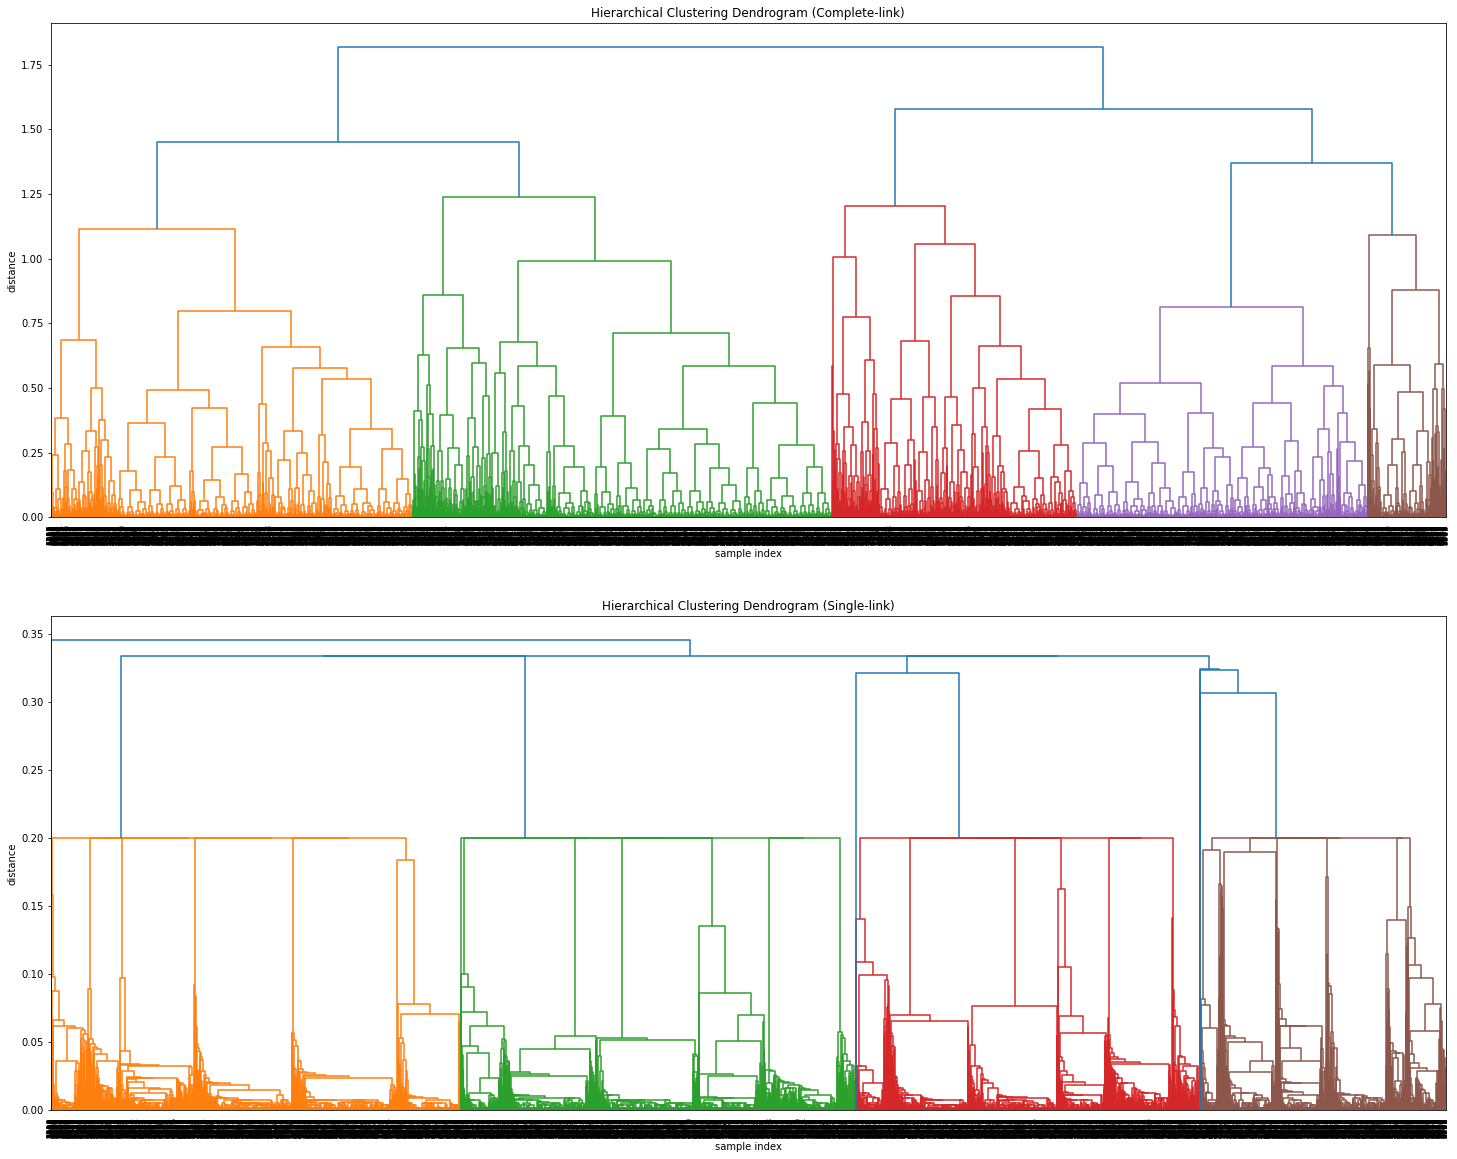

In [17]:
plt.figure(figsize=(25,20)) # fiture size
plt.subplot(2,1,1) # subplot location
plt.title('Hierarchical Clustering Dendrogram (Complete-link)') # title
plt.xlabel('sample index') # x label
plt.ylabel('distance')# y label
dendrogram( # code for dendrogram
    auto_sample2_complete, # clustering type
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.subplot(2,1,2)
plt.title('Hierarchical Clustering Dendrogram (Single-link)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    auto_sample2_single,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [18]:
clus_num = np.arange(2,20,1) # define cut numbers

tree_score = [] # predefine empty list for data storage

for num in clus_num: # for loop that is looping through clus_num
    
    cuttree = hierarchy.cut_tree(auto_sample2_complete, n_clusters = num) # Iterating through and changing n_clusters. I chose the complete link
    tree_score.append(silhouette_score(auto_sample2, cuttree)) # appending silhoutette_score for the pizza data and cuttree

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

In [19]:
results_cuttree = pd.DataFrame(clus_num) # create data frame
results_cuttree['silhouette_score'] = tree_score # append results to data frame
results_cuttree.sort_values(by='silhouette_score', ascending=False) # sort

# This tells us that cutting into 7 clusters in the best

,0,silhouette_score
0,2,0.338776
1,3,0.290228
2,4,0.244736
6,8,0.237397
5,7,0.235624
4,6,0.234547
7,9,0.234101
17,19,0.233833
16,18,0.232570
15,17,0.230199


In [20]:
best_tree = hierarchy.cut_tree(auto_sample2_complete, n_clusters = 2) # define 2 clusters
best_tree # view clusters
a_sample['hierarchical_clusters'] =  best_tree # add clusters to pizza data
a_sample.sort_values('hierarchical_clusters') # sort by cluster values

,agecat,credit_score,veh_age,claimcst0,kmeans_clusters,hierarchical_clusters
36024,5.0,723.0,3,0.000000,2,0
17552,4.0,312.0,2,2210.412697,10,0
2073,5.0,748.0,4,0.000000,2,0
52368,3.0,786.0,4,0.000000,8,0
929,1.0,631.0,4,0.000000,0,0
...,...,...,...,...,...,...
2757,3.0,659.0,2,0.000000,9,1
20400,4.0,456.0,2,0.000000,10,1
33351,3.0,670.0,1,0.000000,6,1
16950,4.0,714.0,2,0.000000,9,1


In [21]:
a_sample.reset_index().columns

Index(['index', 'agecat', 'credit_score', 'veh_age', 'claimcst0',
       'kmeans_clusters', 'hierarchical_clusters'],
      dtype='object')

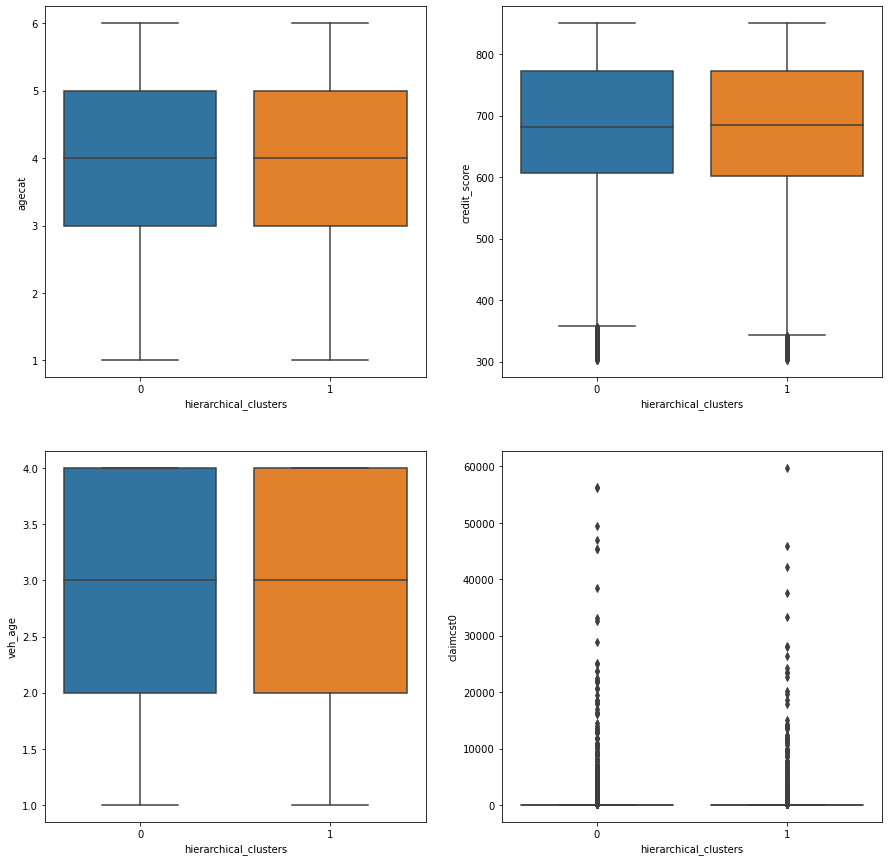

In [22]:
fig, axes = plt.subplots(2, 2, figsize = (15,15))


ax = sns.boxplot(x="hierarchical_clusters", y="agecat",data = a_sample, orient='v', 
    ax=axes[0, 0])
ax = sns.boxplot(x="hierarchical_clusters", y="credit_score",data = a_sample, orient='v', 
    ax=axes[0, 1])
ax = sns.boxplot(x="hierarchical_clusters", y="veh_age", data = a_sample, orient='v', 
    ax=axes[1, 0])
ax = sns.boxplot(x="hierarchical_clusters", y="claimcst0", data=a_sample, orient='v', 
    ax=axes[1, 1])
